In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.layers import Dense


In [2]:
churn_data = pd.read_csv(r"C:\Users\MSIGE65\Desktop\programming\DL & NLP - Learnbay\Amritansh - DL& NLP\datasets\churn rate\Churn_Modelling.csv", index_col="RowNumber")

churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
churn_data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
churn_data.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
df = churn_data.drop(columns=['CustomerId', 'Surname'])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# cat_cols = df.select_dtypes('object').columns
# for i in cat_cols:
#     df[i] = df[i].astype('category').cat.codes

# df.sample(10)

In [8]:
df = pd.get_dummies(df, 'geo', columns=['Geography'])
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,geo_France,geo_Germany,geo_Spain
RowNumber,,,,,,,,,,,,,
1,619,Female,42,2,0.00,1,1,1,101348.88,1,True,False,False
2,608,Female,41,1,83807.86,1,0,1,112542.58,0,False,False,True
3,502,Female,42,8,159660.80,3,1,0,113931.57,1,True,False,False
4,699,Female,39,1,0.00,2,0,0,93826.63,0,True,False,False
5,850,Female,43,2,125510.82,1,1,1,79084.10,0,False,False,True


In [9]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [10]:
df = df.replace(to_replace={'Gender':{'Female':1, 'Male':0}})
df.sample(10)

C:\Users\MSIGE65\AppData\Local\Temp\ipykernel_16512\1012411462.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(to_replace={'Gender':{'Female':1, 'Male':0}})


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,geo_France,geo_Germany,geo_Spain
RowNumber,,,,,,,,,,,,,
5975,773,0,45,8,96877.21,1,1,1,113950.51,0,True,False,False
2008,705,1,43,10,146547.78,1,0,1,10072.55,1,False,True,False
8500,498,0,35,2,121968.11,2,0,1,188343.05,0,False,True,False
7810,579,0,43,2,145843.82,1,1,1,198402.37,1,False,False,True
1996,584,1,44,5,95671.75,2,1,1,106564.88,0,True,False,False
9231,582,0,35,8,121309.17,2,1,1,28750.67,0,False,True,False
6444,753,0,92,3,121513.31,1,0,1,195563.99,0,True,False,False
6309,565,0,52,5,97720.35,2,1,0,175070.94,1,False,True,False
7556,731,0,41,3,0.00,2,1,0,101371.72,0,False,False,True


In [11]:
df = df.astype(float)
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,geo_France,geo_Germany,geo_Spain
RowNumber,,,,,,,,,,,,,
1,619.0,1.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0,1.0,0.0,0.0
2,608.0,1.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0,0.0,0.0,1.0
3,502.0,1.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0,1.0,0.0,0.0
4,699.0,1.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0,1.0,0.0,0.0
5,850.0,1.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0,0.0,0.0,1.0


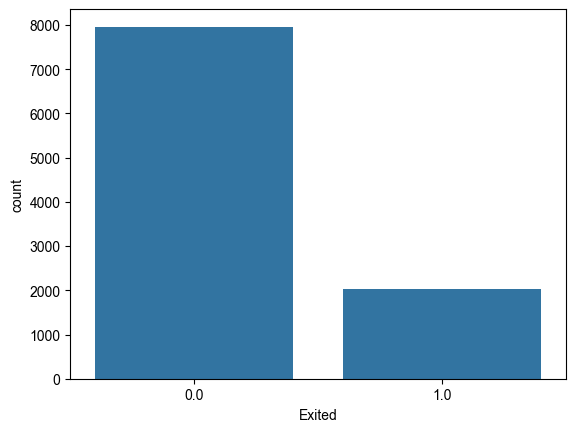

In [12]:
sns.barplot(df.Exited.value_counts())
sns.set_style('whitegrid')

array([[<Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>],
       [<Axes: title={'center': 'Balance'}>,
        <Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>,
        <Axes: title={'center': 'IsActiveMember'}>],
       [<Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Exited'}>,
        <Axes: title={'center': 'geo_France'}>,
        <Axes: title={'center': 'geo_Germany'}>],
       [<Axes: title={'center': 'geo_Spain'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

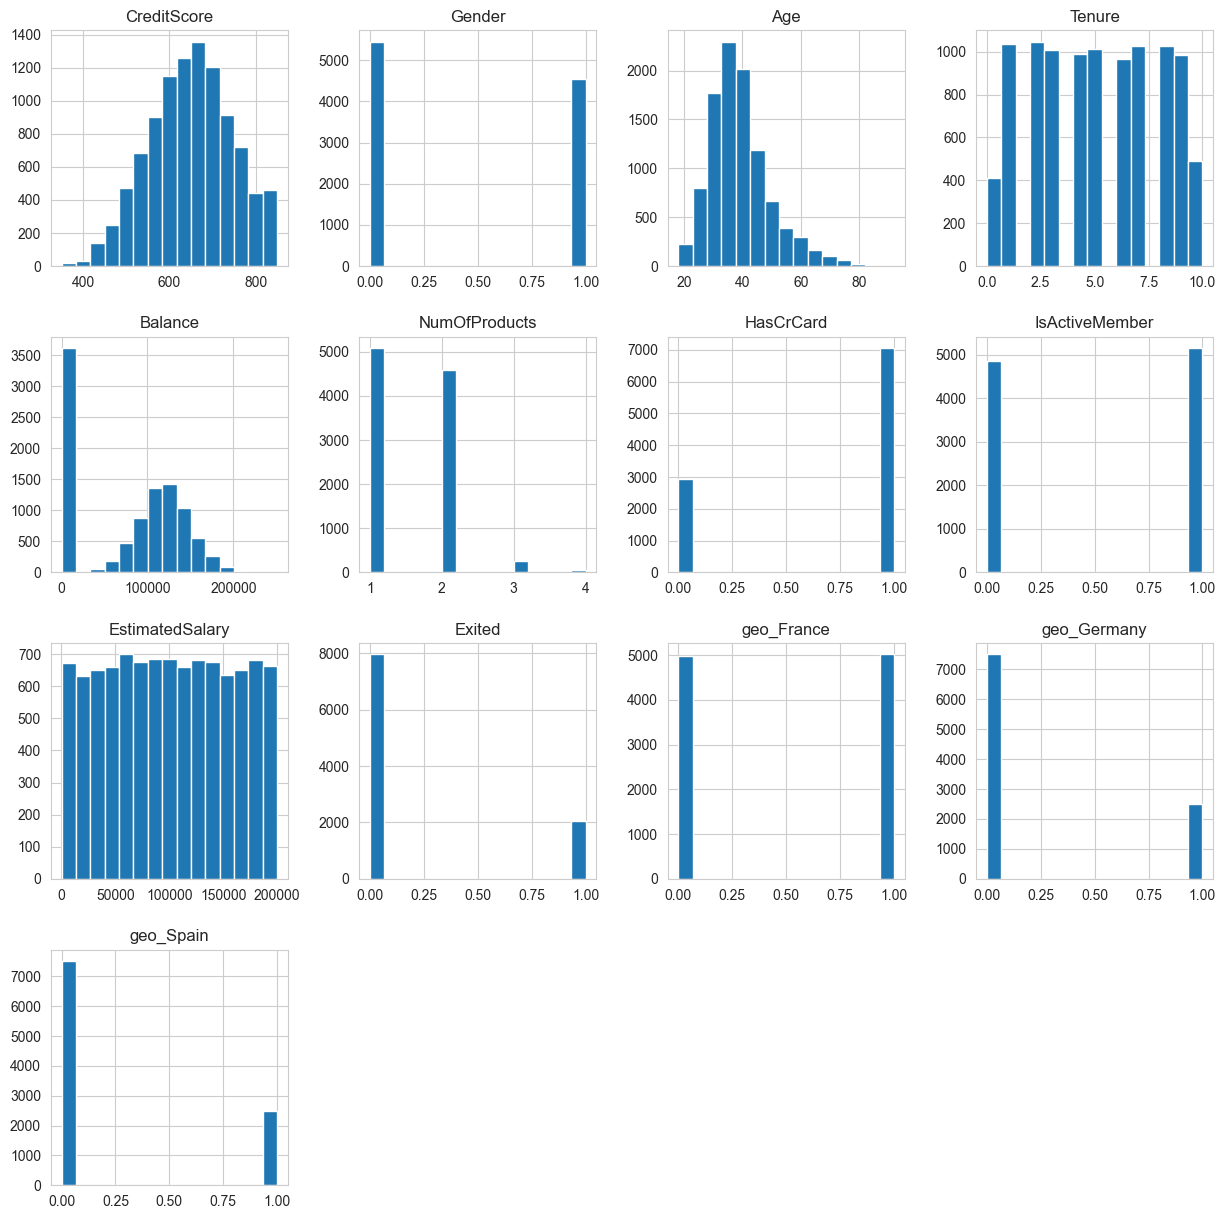

In [13]:
df.hist(figsize=(15,15), bins=15)

In [14]:
X = df.drop('Exited', axis=1)
y = df['Exited'].astype(int)

In [15]:
X

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,geo_France,geo_Germany,geo_Spain
RowNumber,,,,,,,,,,,,
1,619.0,1.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0,0.0,0.0
2,608.0,1.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0,0.0,1.0
3,502.0,1.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0,0.0,0.0
4,699.0,1.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,1.0,0.0,0.0
5,850.0,1.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9996,771.0,0.0,39.0,5.0,0.00,2.0,1.0,0.0,96270.64,1.0,0.0,0.0
9997,516.0,0.0,35.0,10.0,57369.61,1.0,1.0,1.0,101699.77,1.0,0.0,0.0
9998,709.0,1.0,36.0,7.0,0.00,1.0,0.0,1.0,42085.58,1.0,0.0,0.0


In [16]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

sc = StandardScaler()

X[['Balance', 'EstimatedSalary']] = sc.fit_transform(X[['Balance', 'EstimatedSalary']])

In [17]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,geo_France,geo_Germany,geo_Spain
RowNumber,,,,,,,,,,,,
1,619.0,1.0,42.0,2.0,-1.225848,1.0,1.0,1.0,0.021886,1.0,0.0,0.0
2,608.0,1.0,41.0,1.0,0.117350,1.0,0.0,1.0,0.216534,0.0,0.0,1.0
3,502.0,1.0,42.0,8.0,1.333053,3.0,1.0,0.0,0.240687,1.0,0.0,0.0
4,699.0,1.0,39.0,1.0,-1.225848,2.0,0.0,0.0,-0.108918,1.0,0.0,0.0
5,850.0,1.0,43.0,2.0,0.785728,1.0,1.0,1.0,-0.365276,0.0,0.0,1.0


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

### Run all the known ML Classification Algorithm for comparison

In [19]:
# Logistics Regression

# KNN - Classification

# RandomForest Classifier

# Decision Tree Classifier

# Naive Bayes Classifier

# SVM Classifier



In [20]:
model_logistic = LogisticRegression(solver='lbfgs', max_iter=10000)

In [21]:
model_logistic.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [22]:
y_train_pred = model_logistic.predict(X_train)
y_test_pred = model_logistic.predict(X_test)

In [23]:
accuracy_score(y_train, y_train_pred)

0.8141428571428572

In [24]:
accuracy_score(y_test, y_test_pred)

0.8083333333333333

In [25]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      5576
           1       0.62      0.23      0.33      1424

    accuracy                           0.81      7000
   macro avg       0.72      0.59      0.61      7000
weighted avg       0.79      0.81      0.78      7000



In [26]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.96      0.89      2387
           1       0.59      0.20      0.30       613

    accuracy                           0.81      3000
   macro avg       0.71      0.58      0.59      3000
weighted avg       0.78      0.81      0.77      3000



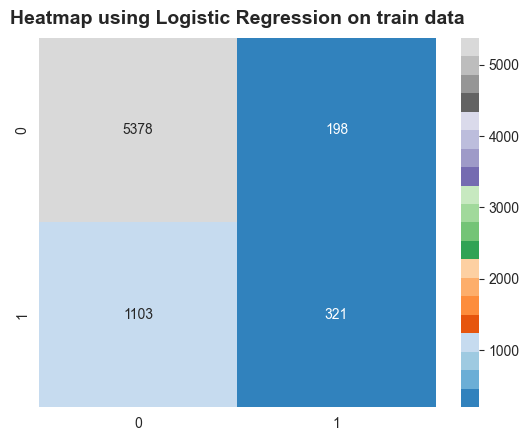

In [27]:
cm = confusion_matrix(y_train, y_train_pred)

cm = confusion_matrix(y_train, y_train_pred)

sns.heatmap(cm, annot=True, fmt='', cmap='tab20c')
plt.title("Heatmap using Logistic Regression on train data", pad=10, fontweight='bold', fontsize=14)
plt.show()

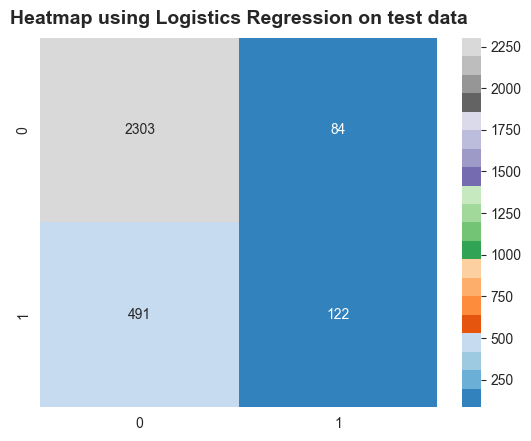

In [28]:
cm = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm, annot=True, fmt='', cmap='tab20c')
plt.title("Heatmap using Logistics Regression on test data", pad=10, fontweight='bold', fontsize=14)
plt.show()

In [29]:
cm

array([[2303,   84],
       [ 491,  122]], dtype=int64)

In [30]:
model_knn = KNeighborsClassifier(n_neighbors=5)

model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [31]:
y_train_pred = model_knn.predict(X_train)
y_test_pred = model_knn.predict(X_test)

In [32]:
accuracy_score(y_train, y_train_pred)

0.845

In [33]:
accuracy_score(y_test, y_test_pred)

0.7953333333333333

In [34]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      5576
           1       0.72      0.39      0.51      1424

    accuracy                           0.84      7000
   macro avg       0.79      0.68      0.71      7000
weighted avg       0.83      0.84      0.83      7000



In [35]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      2387
           1       0.50      0.25      0.33       613

    accuracy                           0.80      3000
   macro avg       0.66      0.59      0.60      3000
weighted avg       0.76      0.80      0.77      3000



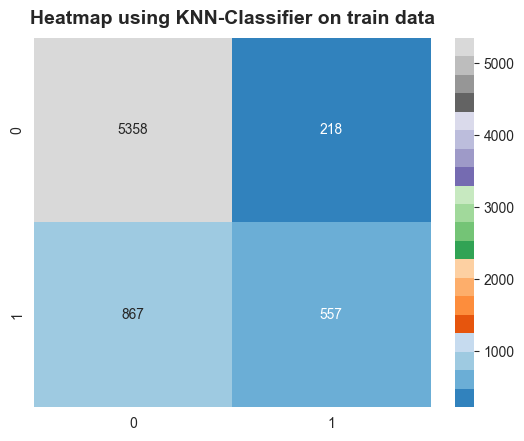

In [36]:
cm = confusion_matrix(y_train, y_train_pred)

sns.heatmap(cm, annot=True, fmt='', cmap='tab20c')
plt.title("Heatmap using KNN-Classifier on train data", pad=10, fontweight='bold', fontsize=14)
plt.show()

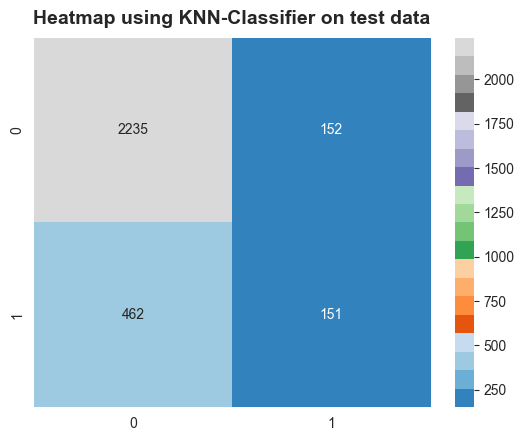

In [37]:
cm = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm, annot=True, fmt='', cmap='tab20c')
plt.title("Heatmap using KNN-Classifier on test data", pad=10, fontweight='bold', fontsize=14)
plt.show()

In [38]:
model_dt = DecisionTreeClassifier()

model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [39]:
y_train_pred = model_dt.predict(X_train)
y_test_pred = model_dt.predict(X_test)


In [40]:
accuracy_score(y_train, y_train_pred)

1.0

In [41]:
accuracy_score(y_test, y_test_pred)

0.787

In [42]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5576
           1       1.00      1.00      1.00      1424

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000



In [43]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      2387
           1       0.48      0.49      0.48       613

    accuracy                           0.79      3000
   macro avg       0.67      0.68      0.67      3000
weighted avg       0.79      0.79      0.79      3000



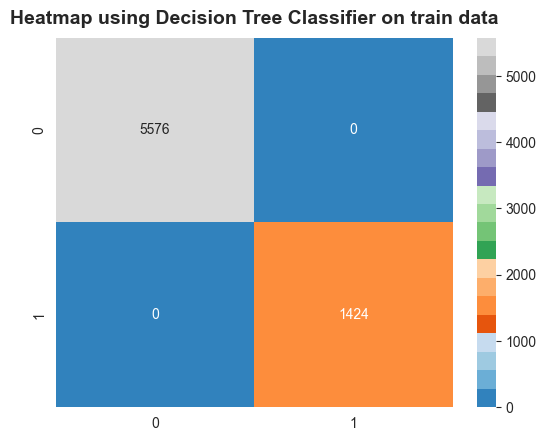

In [44]:
cm = confusion_matrix(y_train, y_train_pred)

sns.heatmap(cm, annot=True, fmt='', cmap='tab20c')
plt.title("Heatmap using Decision Tree Classifier on train data", pad=10, fontweight='bold', fontsize=14)
plt.show()

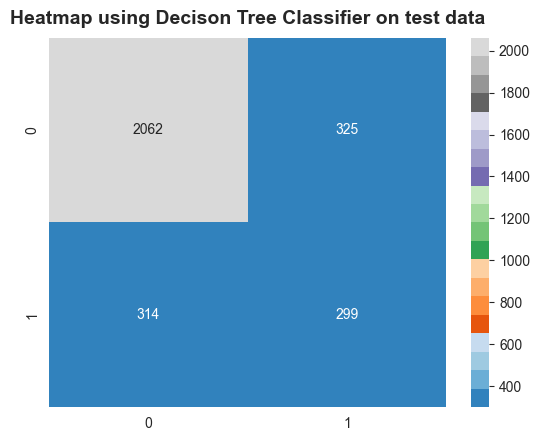

In [45]:
cm = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm, annot=True, fmt='', cmap='tab20c')
plt.title("Heatmap using Decison Tree Classifier on test data", pad=10, fontweight='bold', fontsize=14)
plt.show()

In [46]:
model_RF = RandomForestClassifier(n_estimators=200)

model_RF.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [47]:
y_train_pred = model_RF.predict(X_train)
y_test_pred = model_RF.predict(X_test)

In [48]:
accuracy_score(y_train, y_train_pred)

1.0

In [49]:
accuracy_score(y_test, y_test_pred)

0.8573333333333333

In [50]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5576
           1       1.00      1.00      1.00      1424

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000



In [51]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      2387
           1       0.76      0.44      0.56       613

    accuracy                           0.86      3000
   macro avg       0.81      0.70      0.74      3000
weighted avg       0.85      0.86      0.84      3000



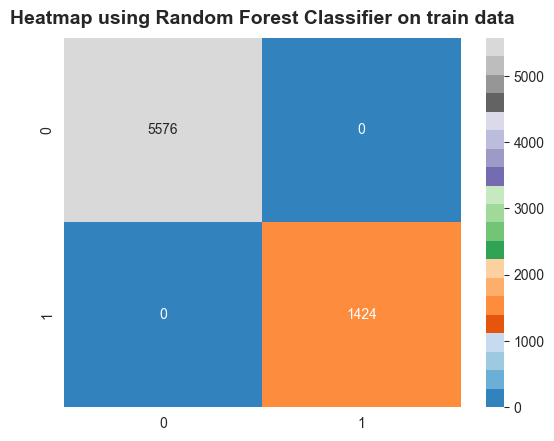

In [52]:
cm = confusion_matrix(y_train, y_train_pred)

sns.heatmap(cm, annot=True, fmt='', cmap='tab20c')
plt.title("Heatmap using Random Forest Classifier on train data", pad=10, fontweight='bold', fontsize=14)
plt.show()

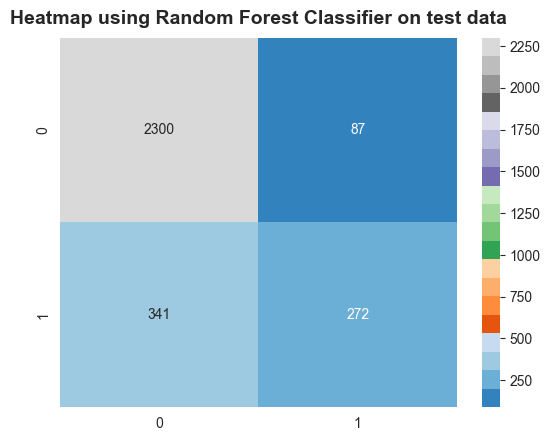

In [53]:
cm = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm, annot=True, fmt='', cmap='tab20c')
plt.title("Heatmap using Random Forest Classifier on test data", pad=10, fontweight='bold', fontsize=14)
plt.show()

In [54]:
model_svc = SVC()

model_svc.fit(X_train, y_train)

SVC()

In [55]:
y_train_pred = model_svc.predict(X_train)
y_test_pred = model_svc.predict(X_test)

In [56]:
accuracy_score(y_train, y_train_pred)

0.7965714285714286

In [57]:
accuracy_score(y_test, y_test_pred)

0.7956666666666666

In [58]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      5576
           1       0.00      0.00      0.00      1424

    accuracy                           0.80      7000
   macro avg       0.40      0.50      0.44      7000
weighted avg       0.63      0.80      0.71      7000



C:\ProgramData\anaconda3\envs\Deep_Learning\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\envs\Deep_Learning\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\envs\Deep_Learning\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [59]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2387
           1       0.00      0.00      0.00       613

    accuracy                           0.80      3000
   macro avg       0.40      0.50      0.44      3000
weighted avg       0.63      0.80      0.71      3000



C:\ProgramData\anaconda3\envs\Deep_Learning\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\envs\Deep_Learning\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\envs\Deep_Learning\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

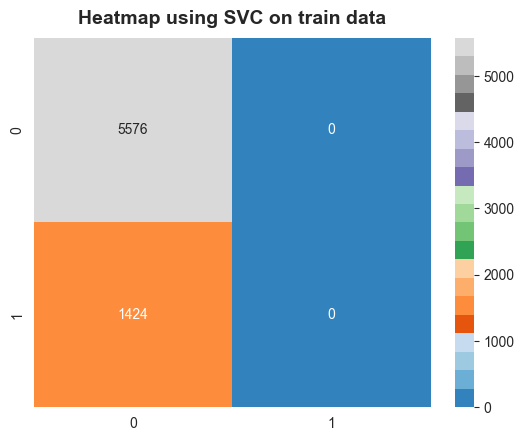

In [60]:
cm = confusion_matrix(y_train, y_train_pred)

sns.heatmap(cm, annot=True, fmt='', cmap='tab20c')
plt.title("Heatmap using SVC on train data", pad=10, fontweight='bold', fontsize=14)
plt.show()

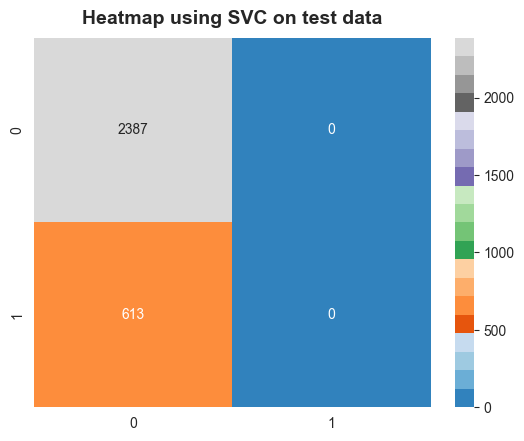

In [61]:
cm = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm, annot=True, fmt='', cmap='tab20c')
plt.title("Heatmap using SVC on test data", pad=10, fontweight='bold', fontsize=14)
plt.show()

### Keras Layers

In [62]:
from tensorflow.keras.layers import Layer

class Linear(Layer):          
    
    """y = w.x + b"""


    def __init__(self, units=32, input_dim=32):
        super(Linear, self).__init__()                      # Constructor

        w_init = tf.random_normal_initializer()             # Weight's random normal intialization


        self.w = tf.Variable(
            inital_value = w_init(shape=(input_dim, units), dtype='float32'), 
            trainable=True)

        b_init = tf.zeros_initializer()                    # Bias initialized with zero.
        self.b = tf.Variable(
            initial_value = b_init(shape=(units, ), dtype='float32'), 
            trainable=True)

        
    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b
         

In [63]:
from tensorflow.keras import Sequential

model = Sequential()

In [ ]:
from tensorflow.keras.layers import Dense

# Optionally, the first layer can receive an 'input_shape' argument:

model = Sequential()
model.add(Dense(32, input_shape=(500,))) # 1st Hidden Layer

# Afterwards, we do automatic shape inference:

model.add(Dense(32))

# This is identical to the following:

model=Sequential()
model.add(Dense(32, input_dim=500))

# And to the following:

model=Sequential()
model.add(Dense(32, batch_input_shape=(None, 500)))

# Note that you can also omit the input_shape argument:
# In that case the model gets built the first time you call 'fit'(or other 
# training and evaluation methods).


model = Sequential()
model.add(Dense(32))
model.add(Dense(32))
model.weights  # returns []

# Whereas if you specify the input shape, the models gets built continuously
# as you are adding layers:

model = Sequential()
model.add(Dense(32, input_shape=(500, )))
model.add(Dense(32))
model.build((None, 500))
model.weights  # returns list of length 4



In [ ]:
model.compile(optmizer = tf.keras.optimizers.Adam(learning_rate=1e-3), 
              loss = tf.keras.losses.BinaryCrossentropy(), 
              metrics = [tf.keras.metrics.BinaryAccuracy(), 
                         tf.keras.metrics.FalseNegatives()])

### Start coding the neural networks in Keras

In [69]:
ann_classifier = Sequential()

ann_classifier.add(Dense(units=32, activation='relu', input_dim=12))
ann_classifier.add(Dense(units=16, activation='relu'))
ann_classifier.add(Dense(units=1, activation='sigmoid'))

In [66]:
X.shape

(10000, 12)

In [70]:
ann_classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [71]:
ann_classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                416       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


### model.fit() function

In [93]:
ann_classifier.fit(X_train, y_train, batch_size=256, epochs=1000, verbose=1, validation_split=0.1)

Epoch 1/1000
25/25 [==============================] - 0s 8ms/step - loss: 0.4330 - accuracy: 0.8167 - val_loss: 0.3897 - val_accuracy: 0.8400
Epoch 2/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.4316 - accuracy: 0.8194 - val_loss: 0.3982 - val_accuracy: 0.8229
Epoch 3/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.4360 - accuracy: 0.8154 - val_loss: 0.3897 - val_accuracy: 0.8343
Epoch 4/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.4300 - accuracy: 0.8168 - val_loss: 0.3924 - val_accuracy: 0.8343
Epoch 5/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.4317 - accuracy: 0.8157 - val_loss: 0.3963 - val_accuracy: 0.8357
Epoch 6/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.4338 - accuracy: 0.8165 - val_loss: 0.3899 - val_accuracy: 0.8371
Epoch 7/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.4326 - accuracy: 0.8181 - val_loss: 0.3890 - val_accuracy: 0.8386
Epoch 

In [77]:
len(X_train)

7000

In [78]:
7000*0.1

700.0

In [94]:
y_train_pred = ann_classifier.predict(X_train)
y_test_pred = ann_classifier.predict(X_test)

94/94 [==============================] - 0s 1ms/step


In [111]:
y_train_pred_labels = (y_train_pred >=0.5).astype(int)
y_test_pred_labels = (y_test_pred >=0.5).astype(int)

In [112]:
accuracy_score(y_train, y_train_pred_labels)

0.8522857142857143

In [113]:
accuracy_score(y_test, y_test_pred_labels)

0.8453333333333334

In [114]:
print(classification_report(y_train, y_train_pred_labels))

              precision    recall  f1-score   support

           0       0.87      0.97      0.91      5576
           1       0.75      0.41      0.53      1424

    accuracy                           0.85      7000
   macro avg       0.81      0.69      0.72      7000
weighted avg       0.84      0.85      0.83      7000



In [115]:
print(classification_report(y_test, y_test_pred_labels))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      2387
           1       0.74      0.38      0.50       613

    accuracy                           0.85      3000
   macro avg       0.80      0.67      0.70      3000
weighted avg       0.83      0.85      0.83      3000



In [116]:
cm = confusion_matrix(y_train, y_train_pred_labels)

Text(0.5, 1.0, 'Confusion Matrix for train data using ANN custom design')

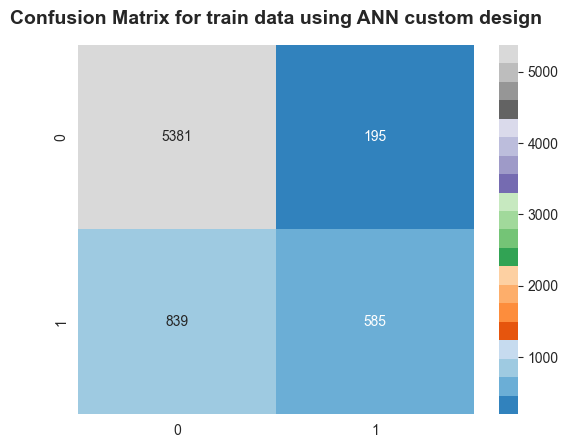

In [117]:
sns.heatmap(cm, annot=True, fmt='', cmap='tab20c')
plt.title("Confusion Matrix for train data using ANN custom design", pad=15, fontweight='bold', fontsize=14)

Text(0.5, 1.0, 'Confusion Matrix for test data using ANN custom design')

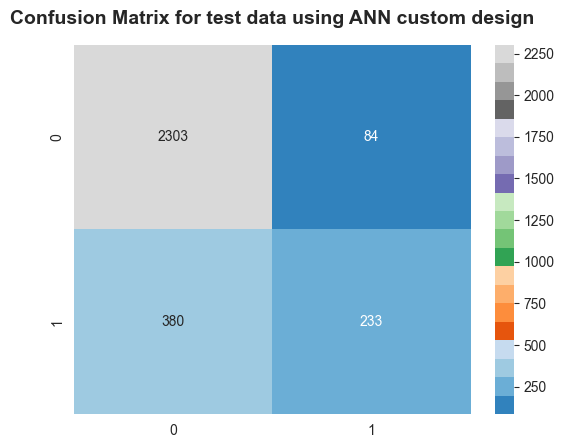

In [118]:
cm = confusion_matrix(y_test, y_test_pred_labels)

sns.heatmap(cm, annot=True, fmt='', cmap='tab20c')
plt.title("Confusion Matrix for test data using ANN custom design", pad=15, fontweight='bold', fontsize=14)

In [119]:
cm

array([[2303,   84],
       [ 380,  233]], dtype=int64)

In [110]:
score, acc = ann_classifier.evaluate(X_test, y_test, batch_size=256)
print(f'Test Score: {score}')
print(f'Test accuracy: {acc}') 

12/12 [==============================] - 0s 3ms/step - loss: 0.3704 - accuracy: 0.8453
Test Score: 0.37038353085517883
Test accuracy: 0.8453333377838135
